In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
s_dict={}
df=pd.read_csv("winequality-red.csv",sep=';')
df.index=df.index+1
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
c=[]
for j in set(df['quality']):
    c.append(len(df[df['quality']==j]))
c

[10, 53, 681, 638, 199, 18]

# Plotting

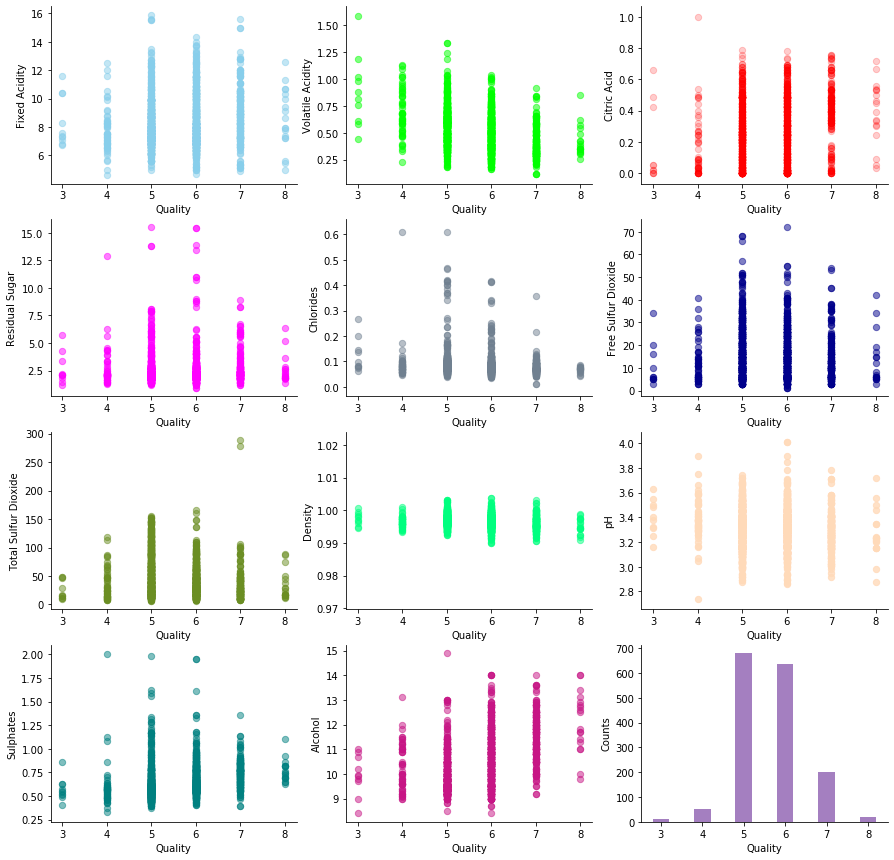

In [4]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,figsize=(15,15))
sb.despine(top=True)

ax1.scatter(df['quality'],df['fixed acidity'],alpha=0.5,s=40,c='skyblue');
ax1.set_ylabel('Fixed Acidity');
ax1.set_xlabel('Quality');

ax2.scatter(df['quality'],df['volatile acidity'],alpha=0.5,s=40,c='lime');
ax2.set_ylabel('Volatile Acidity');
ax2.set_xlabel('Quality');

ax3.scatter(df['quality'],df['citric acid'],alpha=0.2,s=40,c='r');
ax3.set_ylabel('Citric Acid');
ax3.set_xlabel('Quality');

ax4.scatter(df['quality'],df['residual sugar'],alpha=0.5,s=40,c='fuchsia');
ax4.set_ylabel('Residual Sugar');
ax4.set_xlabel('Quality');

ax5.scatter(df['quality'],df['chlorides'],alpha=0.5,s=40,c='slategray');
ax5.set_ylabel('Chlorides');
ax5.set_xlabel('Quality');

ax6.scatter(df['quality'],df['free sulfur dioxide'],alpha=0.5,s=40,c='darkblue');
ax6.set_ylabel('Free Sulfur Dioxide');
ax6.set_xlabel('Quality');

ax7.scatter(df['quality'],df['total sulfur dioxide'],alpha=0.5,s=40,c='olivedrab');
ax7.set_ylabel('Total Sulfur Dioxide');
ax7.set_xlabel('Quality');

ax8.scatter(df['quality'],df['density'],alpha=0.5,s=40,c='springgreen');
ax8.set_ylabel('Density');
ax8.set_xlabel('Quality');

ax9.scatter(df['quality'],df['pH'],alpha=0.8,s=40,c='peachpuff');
ax9.set_ylabel('pH');
ax9.set_xlabel('Quality');

ax10.scatter(df['quality'],df['sulphates'],alpha=0.5,s=40,c='teal');
ax10.set_ylabel('Sulphates');
ax10.set_xlabel('Quality');

ax11.scatter(df['quality'],df['alcohol'],alpha=0.5,s=40,c='mediumvioletred');
ax11.set_ylabel('Alcohol');
ax11.set_xlabel('Quality');

ax12.bar(list(set(df['quality'])),c,alpha=0.5,color='indigo', width=0.4);
ax12.set_ylabel('Counts');
ax12.set_xlabel('Quality');

# Scaling, Train and Test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
cols=df.columns
X=df[cols[:-1]]
y=df[cols[-1]]
print(X.head(),'\n',y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
1      9.4  
2      9.8  
3      9.8  
4      9.8  
5      9.4   
 1    5

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
X_train2=MinMaxScaler().fit_transform(X_train)
X_test2=MinMaxScaler().fit_transform(X_test)

# Logistic Regression 

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr=LogisticRegression(C=100,solver='lbfgs',max_iter=10000,multi_class='auto').fit(X_train,y_train)
s_dict['Logistic Regression']=lr.score(X_test,y_test)
print(s_dict['Logistic Regression'])
#lr_pred=lr.predict(X_test)
#plt.figure()
#plt.plot(y_test,'-')
#plt.plot(lr_pred, '-x',color='red')

0.625


In [10]:
lrs=LogisticRegression(C=1,solver='liblinear',max_iter=10000,multi_class='auto').fit(X_train2,y_train)
s_dict['Logistic Regression (scaled)']=lrs.score(X_test2,y_test)
print(s_dict['Logistic Regression (scaled)'])

0.6175


# Support Vector Machine 

In [11]:
from sklearn.svm import SVC

In [33]:
sv=SVC(kernel='sigmoid',C=10,gamma='auto').fit(X_train2,y_train)
s_dict['SVM (scaled)']=sv.score(X_test2,y_test)
print(s_dict['SVM (scaled)'])

0.625


In [36]:
sv=SVC(kernel='rbf',C=100,gamma='scale').fit(X_train,y_train)
s_dict['SVM']=sv.score(X_test,y_test)
print(s_dict['SVM'])

0.595


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt=DecisionTreeClassifier(max_depth=7,min_samples_leaf=1,random_state=0).fit(X_train,y_train)
s_dict['Decision Tree']=dt.score(X_test,y_test)
print(s_dict['Decision Tree'])

0.6275


# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=0).fit(X_train,y_train)
s_dict['Random Forest']=rf.score(X_test,y_test)
print(s_dict['Random Forest'])

0.7025


# Gradient Boosting Classifier

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [148]:
gb=GradientBoostingClassifier(learning_rate=0.5,max_depth=4,random_state=0).fit(X_train,y_train)
s_dict['Gradient Booster']=gb.score(X_test,y_test)
print(s_dict['Gradient Booster'])

0.6875


# K Nearest Neighbors

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
knn=KNeighborsClassifier(n_neighbors=60,algorithm='auto').fit(X_train,y_train)
s_dict['kNN']=knn.score(X_test,y_test)
print(s_dict['kNN'])

0.55


In [187]:
knn=KNeighborsClassifier(n_neighbors=60,algorithm='ball_tree').fit(X_train2,y_train)
s_dict['kNN (scaled)']=knn.score(X_test2,y_test)
print(s_dict['kNN (scaled)'])

0.6025


# Neural Network

In [188]:
from sklearn.neural_network import MLPClassifier

In [211]:
nn=MLPClassifier(hidden_layer_sizes=[10,10],activation='relu',solver='adam',alpha=0.01,max_iter=1000,random_state=0).fit(X_train,y_train)
s_dict['Neural Network']=nn.score(X_test,y_test)
print(s_dict['Neural Network'])

0.63


# Score Graph

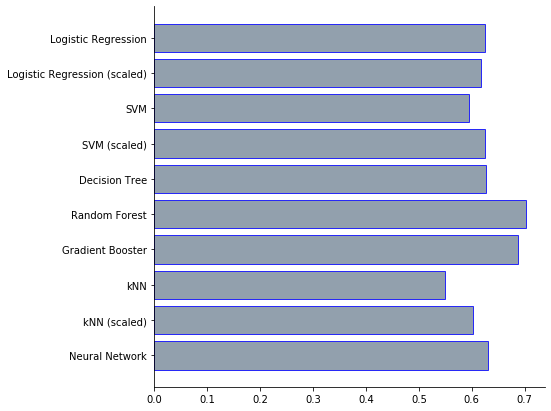

In [233]:
plt.figure(figsize=(7,7))
plt.barh(range(len(s_dict)),(list(s_dict.values())[::-1]),align='center',color='lightslategray',edgecolor='blue',alpha=0.8)
plt.yticks(range(len(s_dict)), list(s_dict.keys())[::-1]);
sb.despine()
plt.show()

# Best Algorithm

In [240]:
p=(max(s_dict.values()))
for a,i in s_dict.items():
    if i==p:
        print("Best Algorithm for Red Wine Quality prediction is {} with a test-set accuracy of {}%".format(a,100*p))
        break

Best Algorithm for Red Wine Quality prediction is Random Forest with a test-set accuracy of 70.25%
